##**Deep Learning Group Assignment**
**March 2024**

---



In [1]:
#Verify GPU Usage
!nvidia-smi

Mon Mar  4 10:04:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#Mount Drive & Install YOLOv8

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 4.0 MB/s eta 0:00:00


In [3]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Training YOLOv8 on our Custom Labeled Dataset

## **Small Model (YOLOv8s)**

In [4]:
!yolo task=detect mode=train model=yolov8s.pt data="/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/data.yaml" epochs=25 imgsz=640 batch=16 project="/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/train_results" name=objects

100% 21.5M/21.5M [00:00<00:00, 167MB/s]
Ultralytics YOLOv8.1.22 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/train_results, name=objects2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_

### Check Results

In the Normalized Confusion Matrix we see that our model has a very good detection rate with 'mask on' (75%), and 'no mask on' (73%). It seems to be the weakest with 'background' (1%).

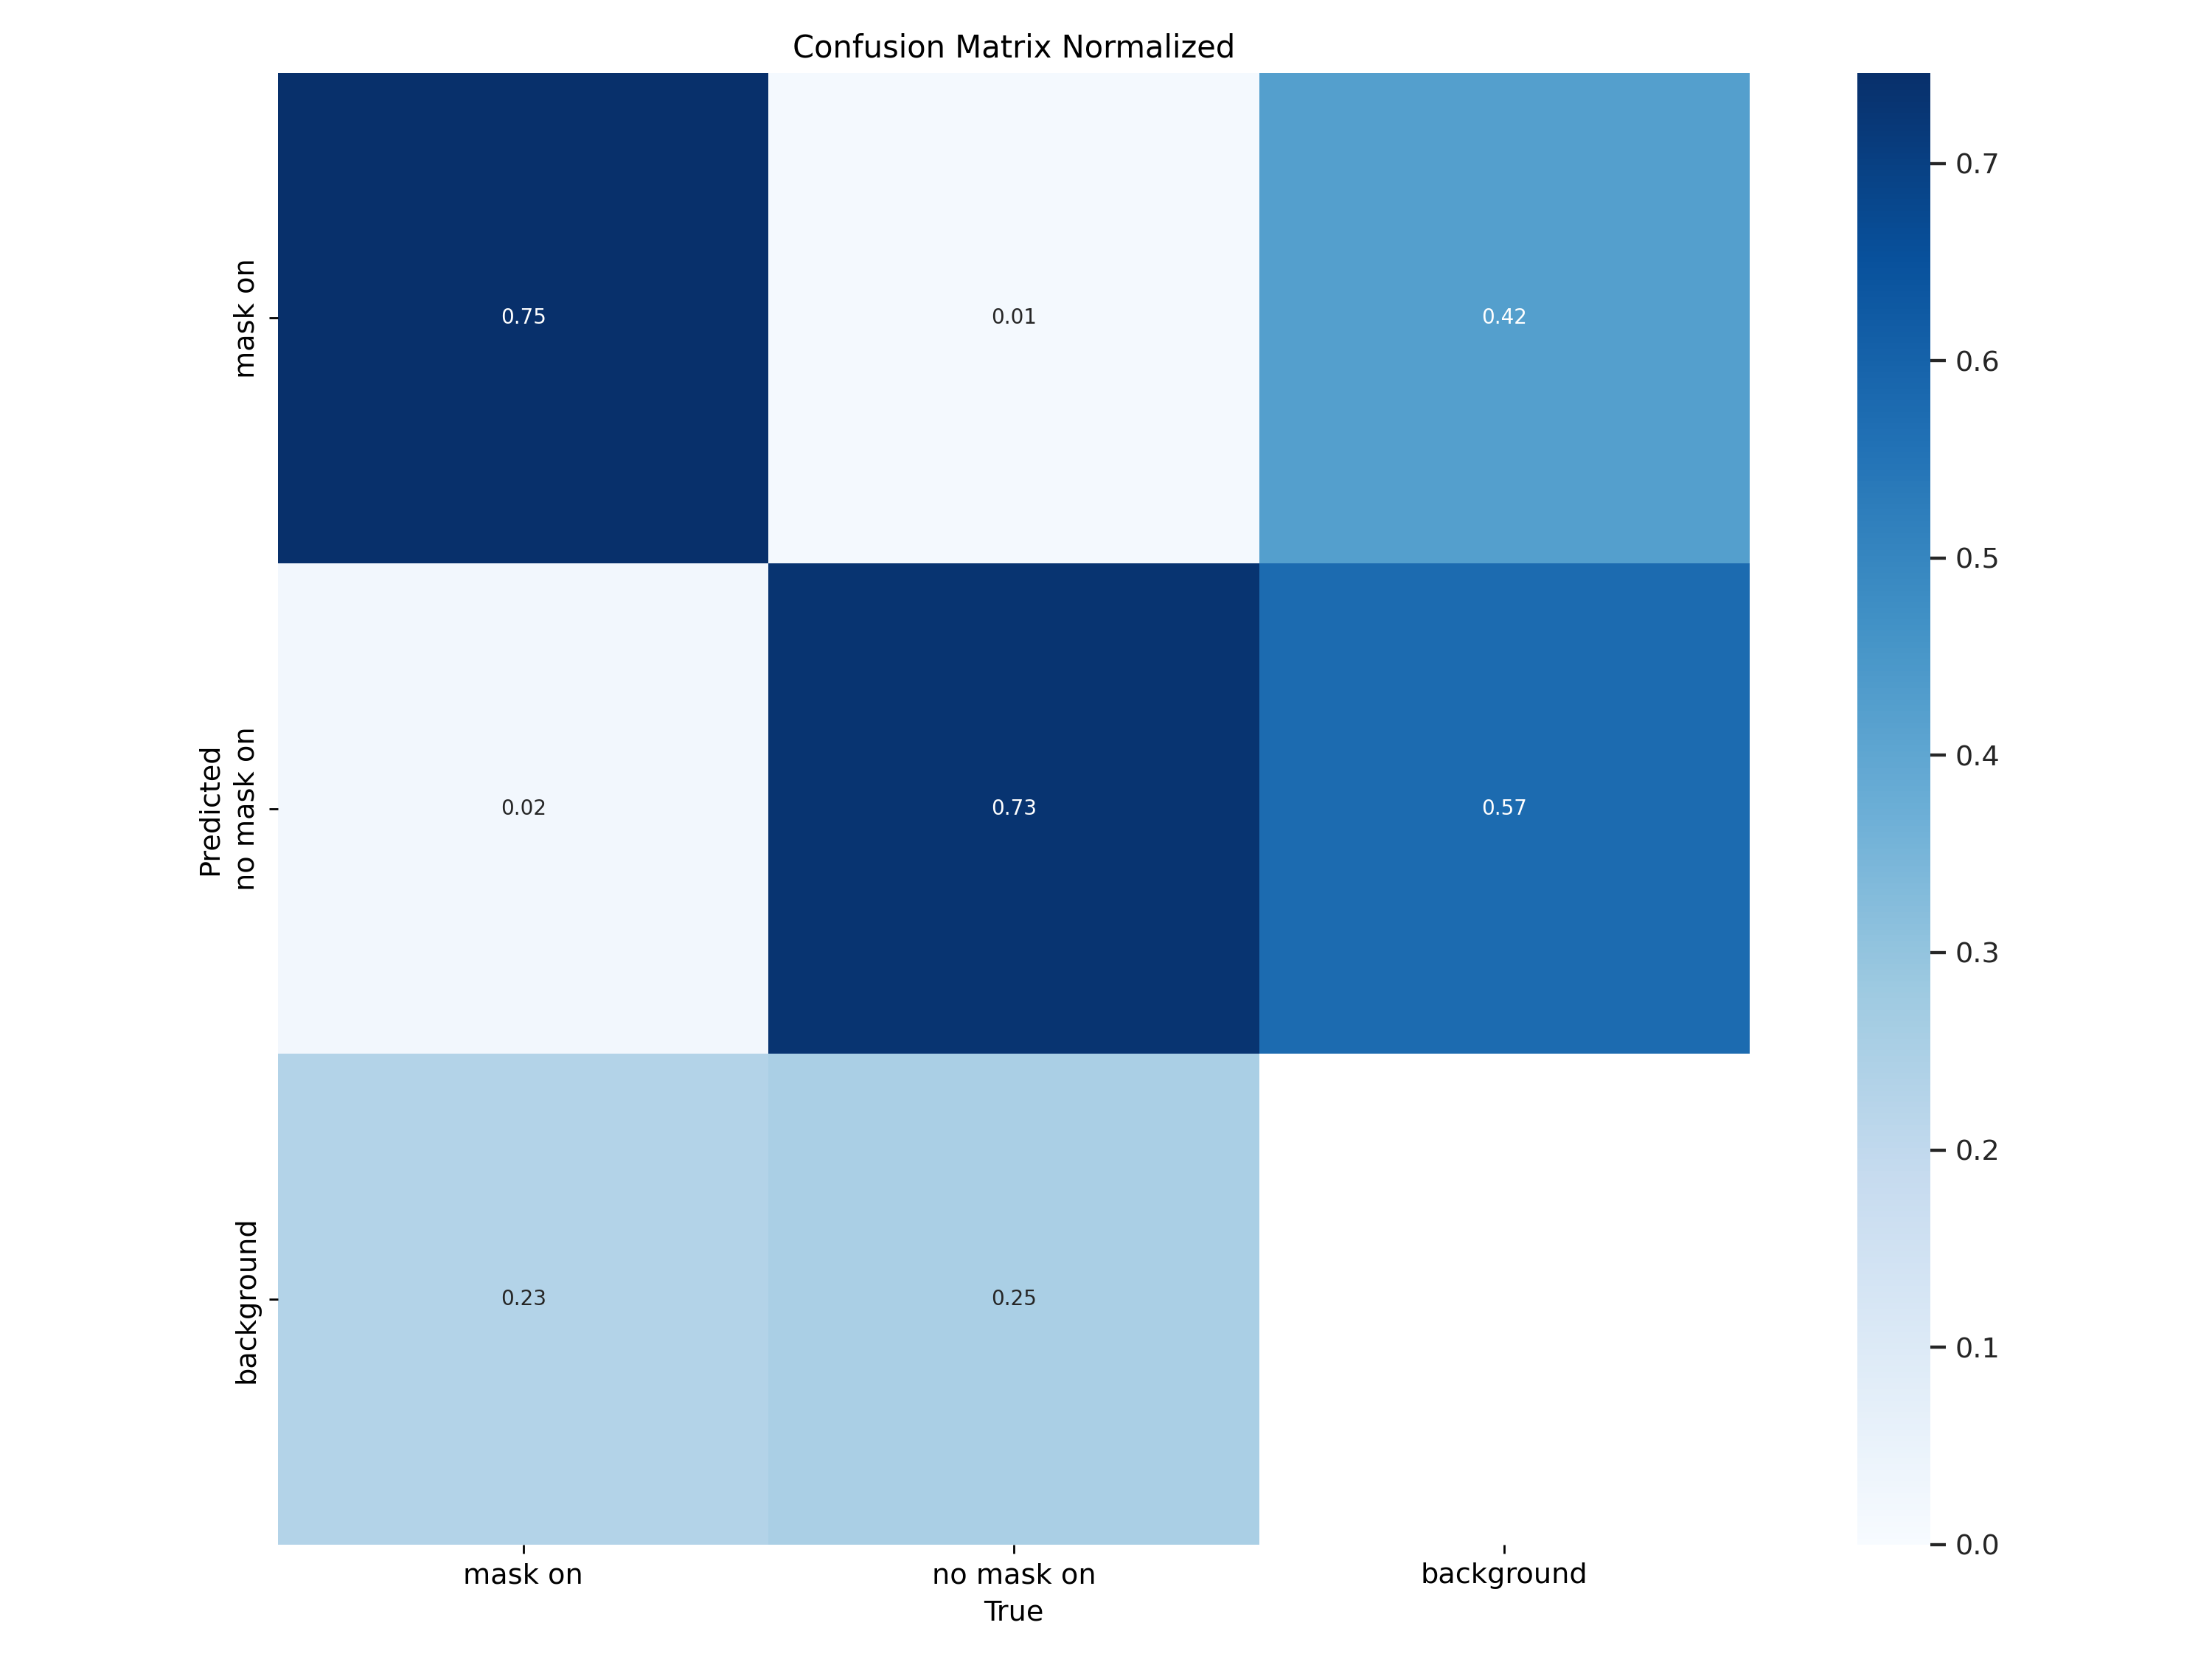

In [11]:
from IPython.display import Image, display
Image(filename="/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/train_results/objects2/confusion_matrix_normalized.png", width=600)

With the results seen in the following graphs, we can spot that losses have been decreasing along the 25 epochs, as we do not see a long flat tail at the end of these epochs, we may assume we could achieve better results in loss metrics if we increase the number of epochs.

Precision and Recall are also seeing a steep improvement throughout the epochs, but still with some room for increasing the metrics.

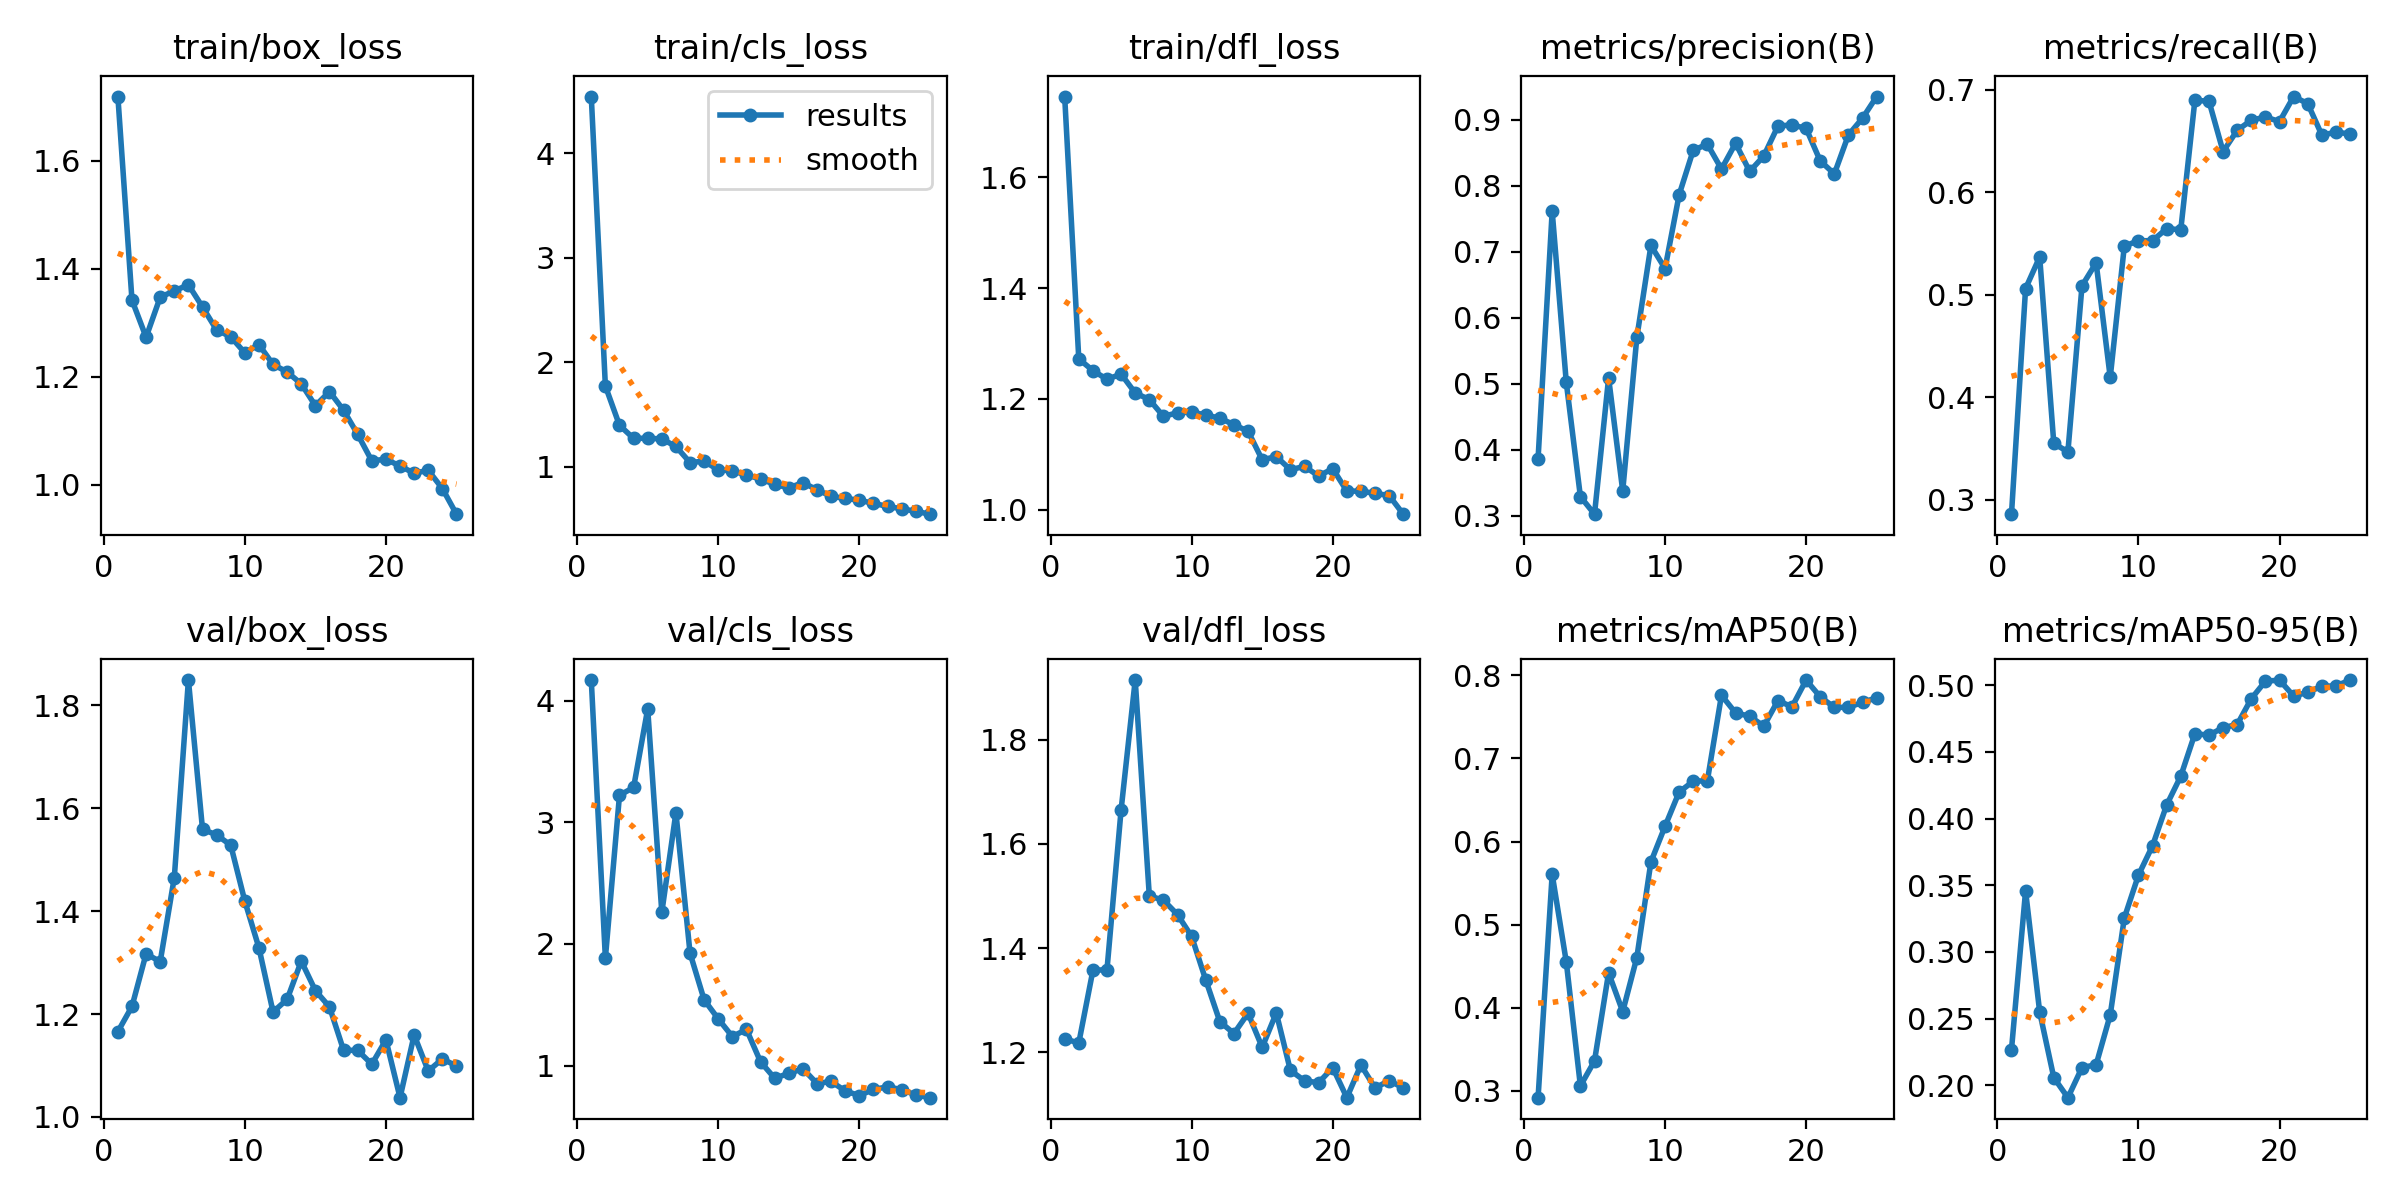

In [12]:
Image(filename="/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/train_results/objects2/results.png", width=1200)

In the following image we can see some of the results obtained with the validation set, where we can check that the model is doing pretty good, even thought we can see that some backgrounds are labeled as 'mask on' or 'no mask on'.

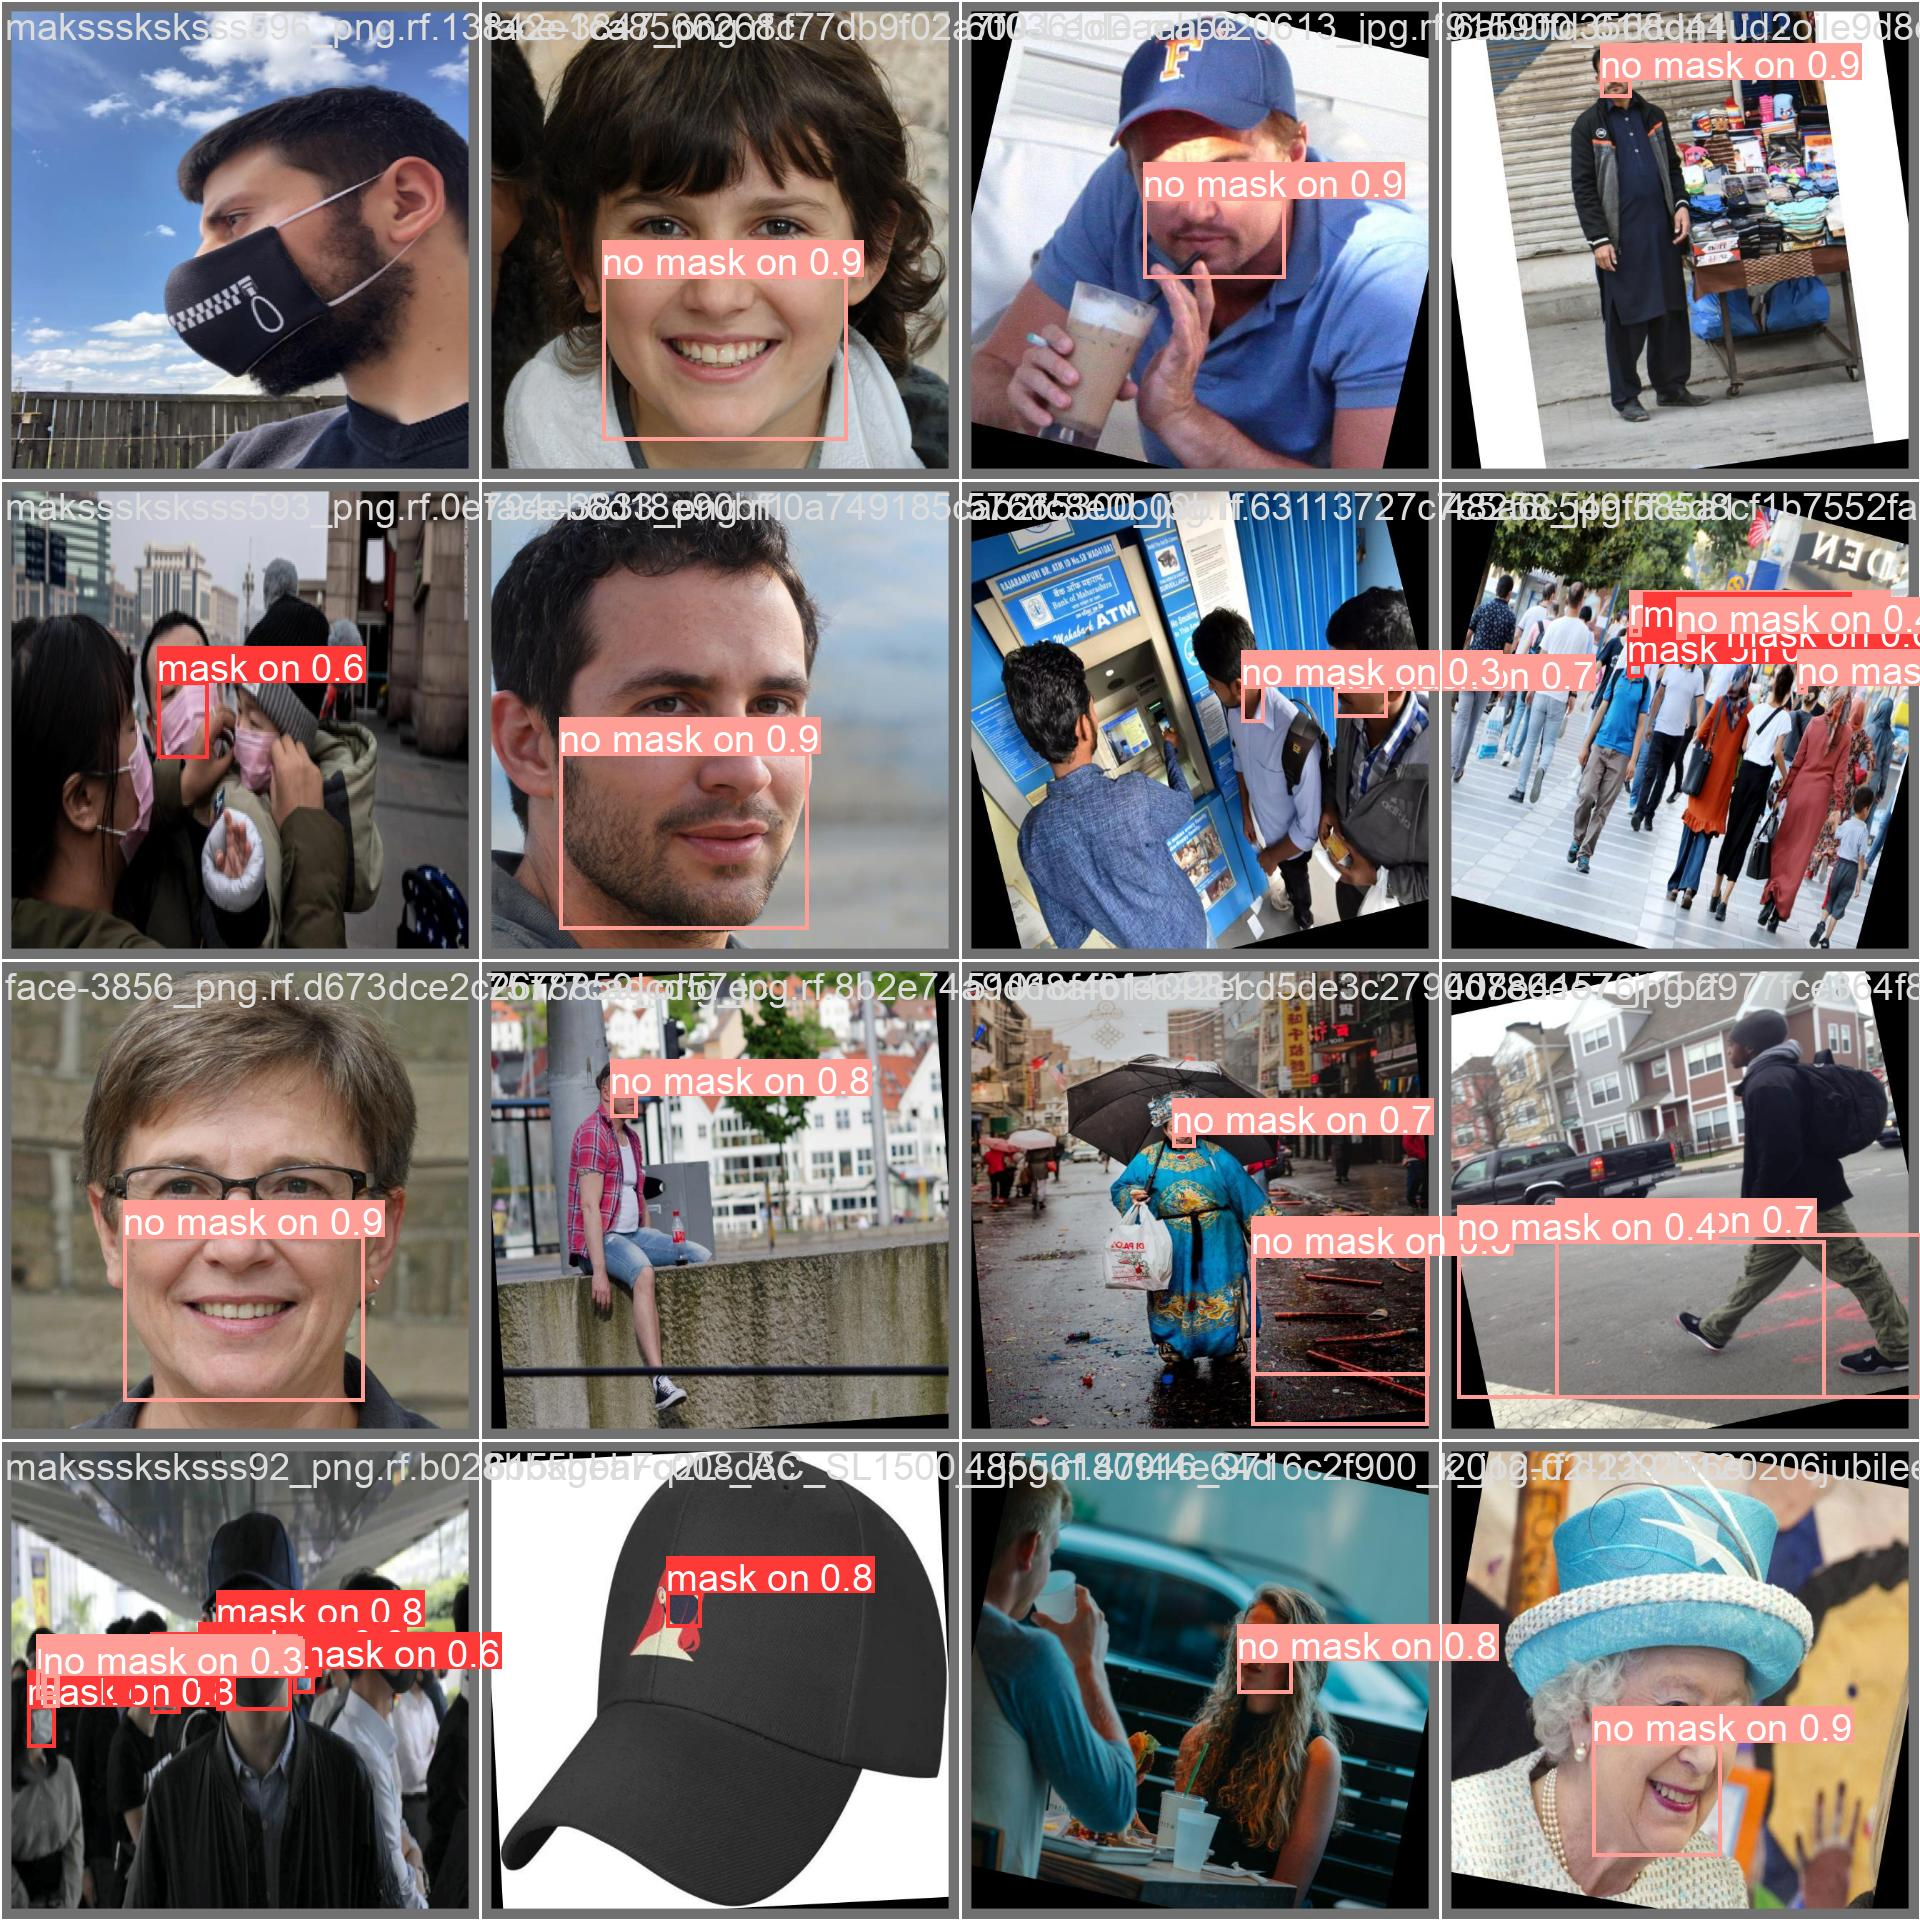

In [13]:
Image(filename="/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/train_results/objects2/val_batch1_pred.jpg", width=1200)

Looking into the validation set results with our second best model below, we see great metrics with over 75% of mAP50 in every class, which as we mentioned earlier often vary a lot in form and aspect within our dataset, making somewhat harder for the model to identify it.

In [14]:
!yolo task=detect mode=val model="/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/train_results/objects2/weights/best.pt" data="/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/data.yaml"


Ultralytics YOLOv8.1.22 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100% 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:06<00:00,  1.37s/it]
                   all         73        260      0.887      0.669      0.794        0.5
               mask on         73        181      0.954       0.68      0.833      0.489
            no mask on         73         79       0.82      0.658      0.755      0.512
Speed: 3.8ms preprocess, 19.5ms inference, 0.0ms loss, 14.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## **Medium Model (YOLOv8m)**

We will now retrain the Medium model and try some hyperparameters to see if we can improve our results.

In [15]:
!yolo task=detect mode=train model=yolov8m.pt data="/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/data.yaml" epochs=50 imgsz=640 batch=16 project="/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/train_results_m" patience=10 optimizer='Adam' perspective=0.001 name=objects


100% 49.7M/49.7M [00:00<00:00, 206MB/s]
Ultralytics YOLOv8.1.22 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/train_results_m, name=objects, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_

### Check Results

In the Normalized Confusion Matrix we see that our model has a not very good detection rate with 'mask on' (51%), and 'no mask on' (43%), and the low metrics for the 'background'.

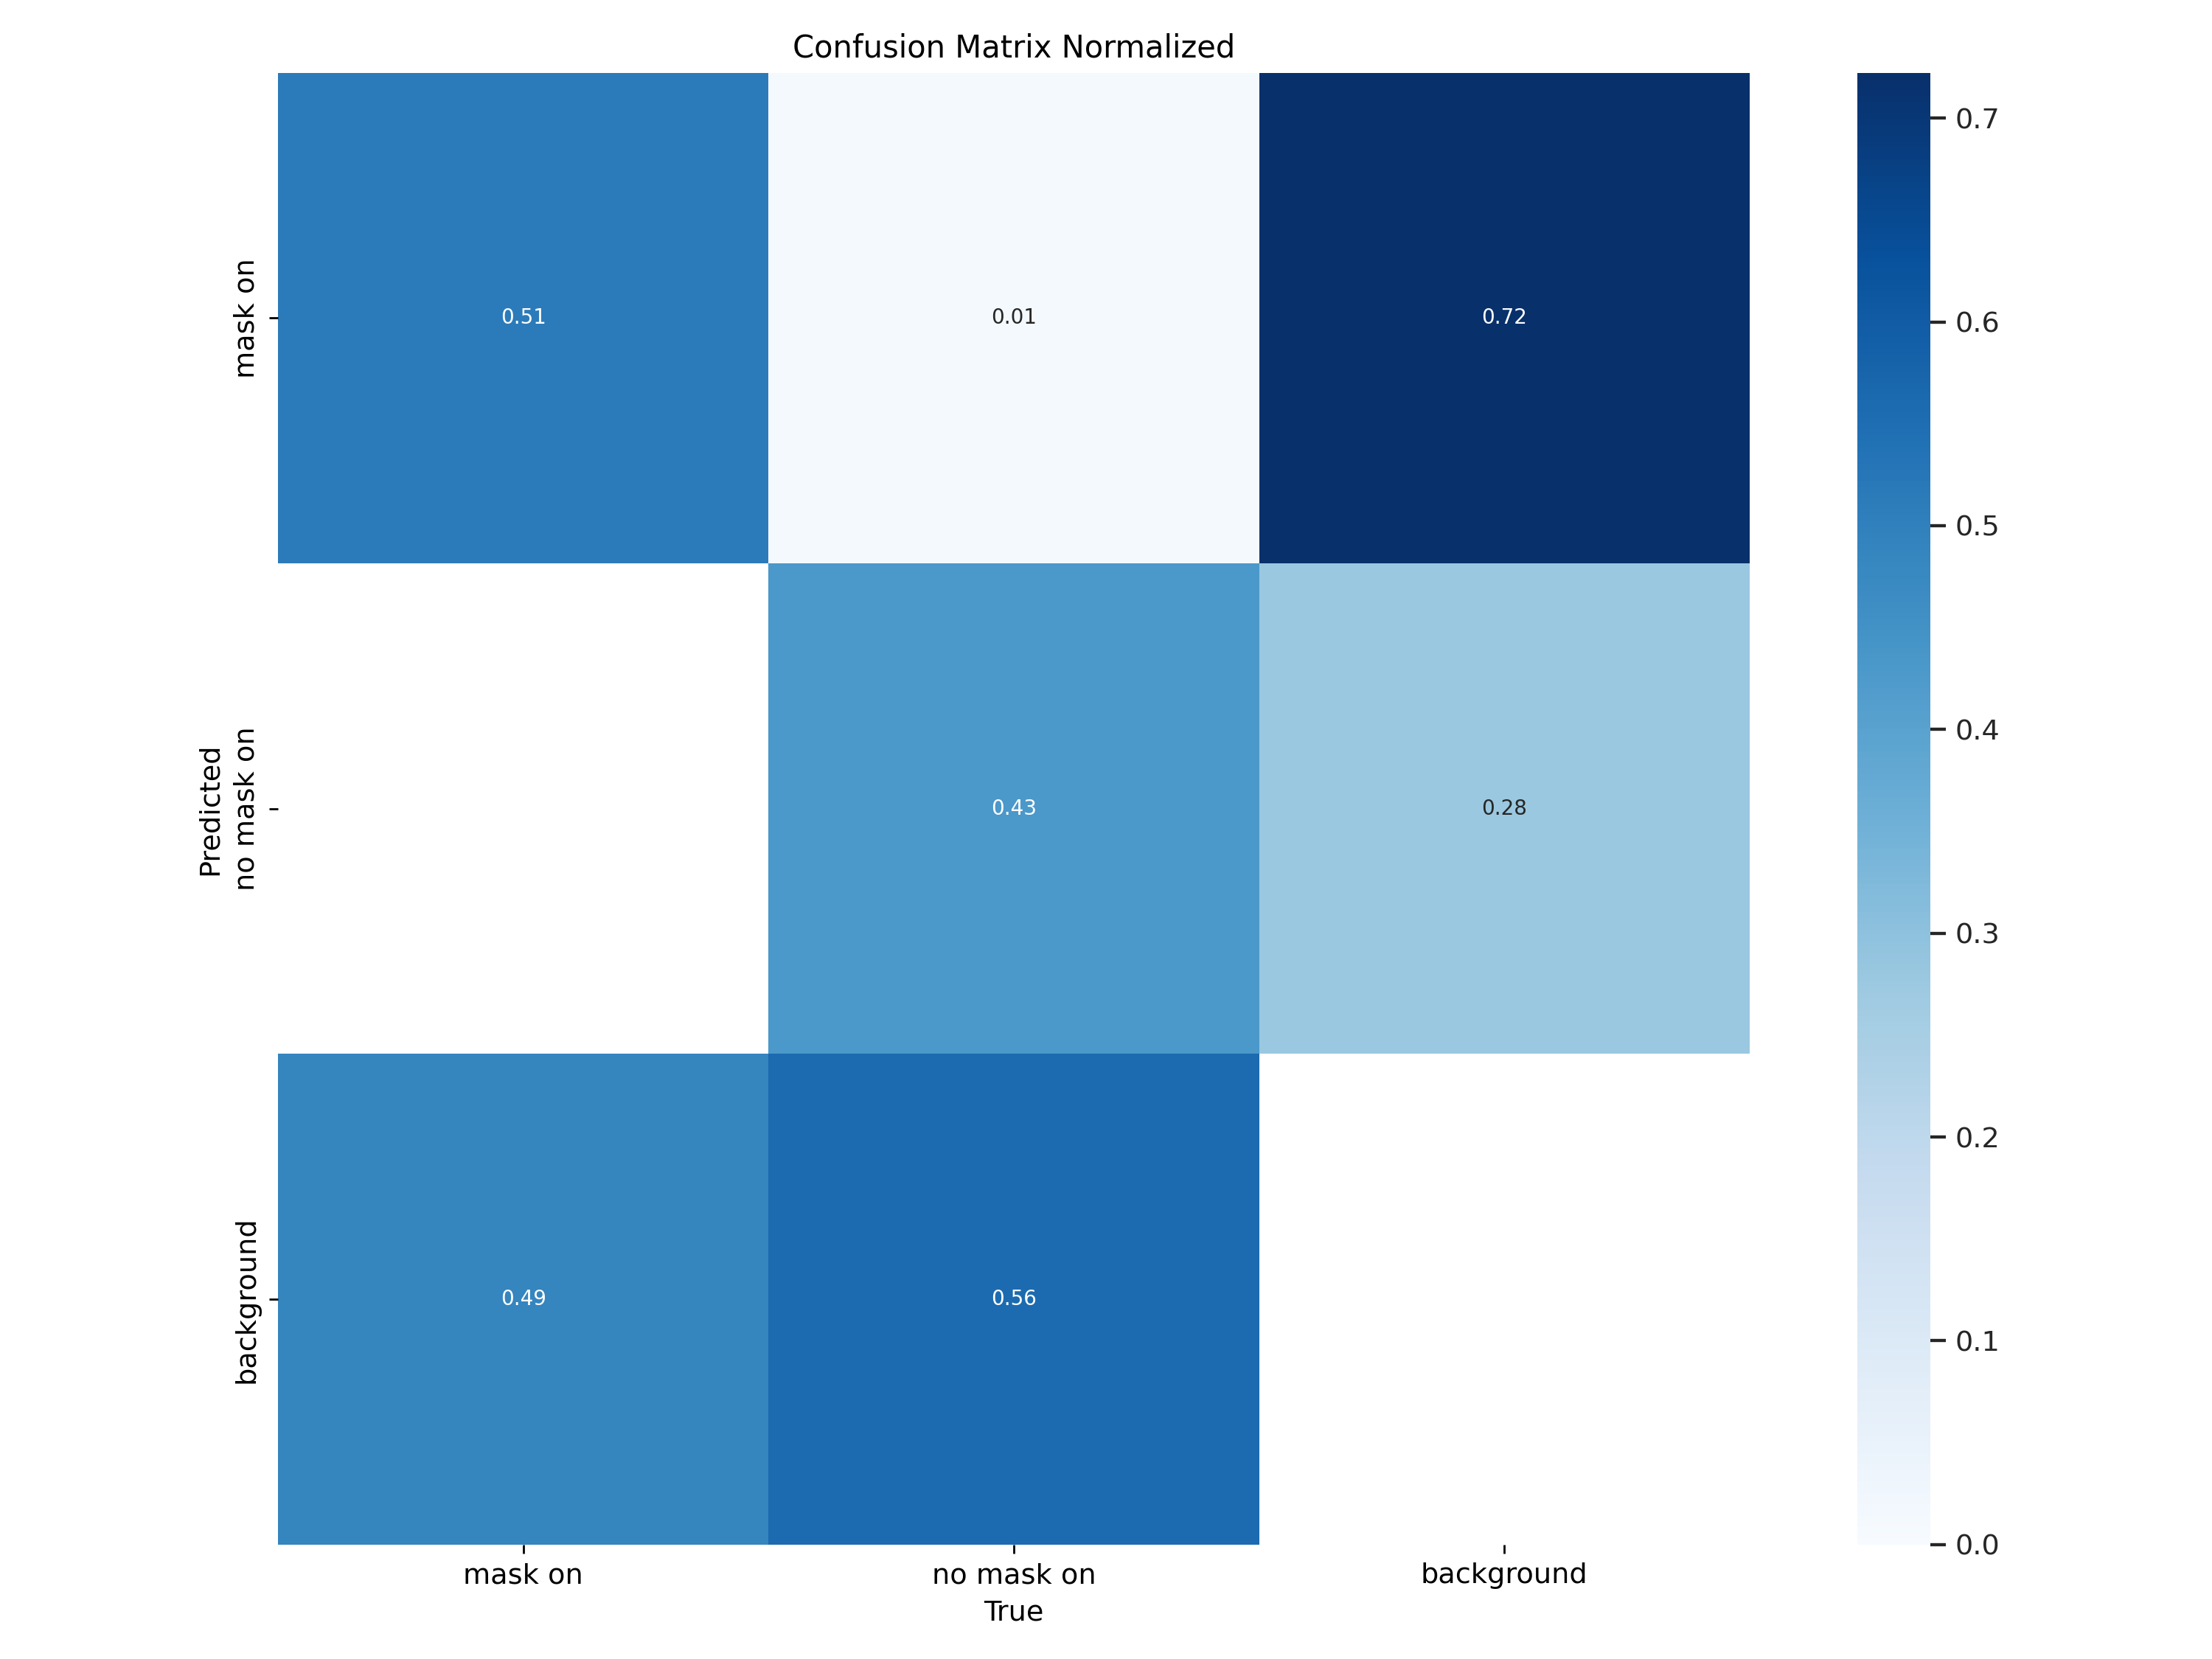

In [16]:
from IPython.display import Image, display
Image(filename="/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/train_results_m/objects/confusion_matrix_normalized.png", width=600)

With the results seen in the following graphs, we can spot that losses have been decreasing along the 50 epochs, as we do not see a long flat tail at the end of these epochs, we may assume we could achieve better results in loss metrics if we increase the number of epochs.

Precision and Recall are also seeing a steep improvement throughout the epochs, but still with some room for increasing the metrics.

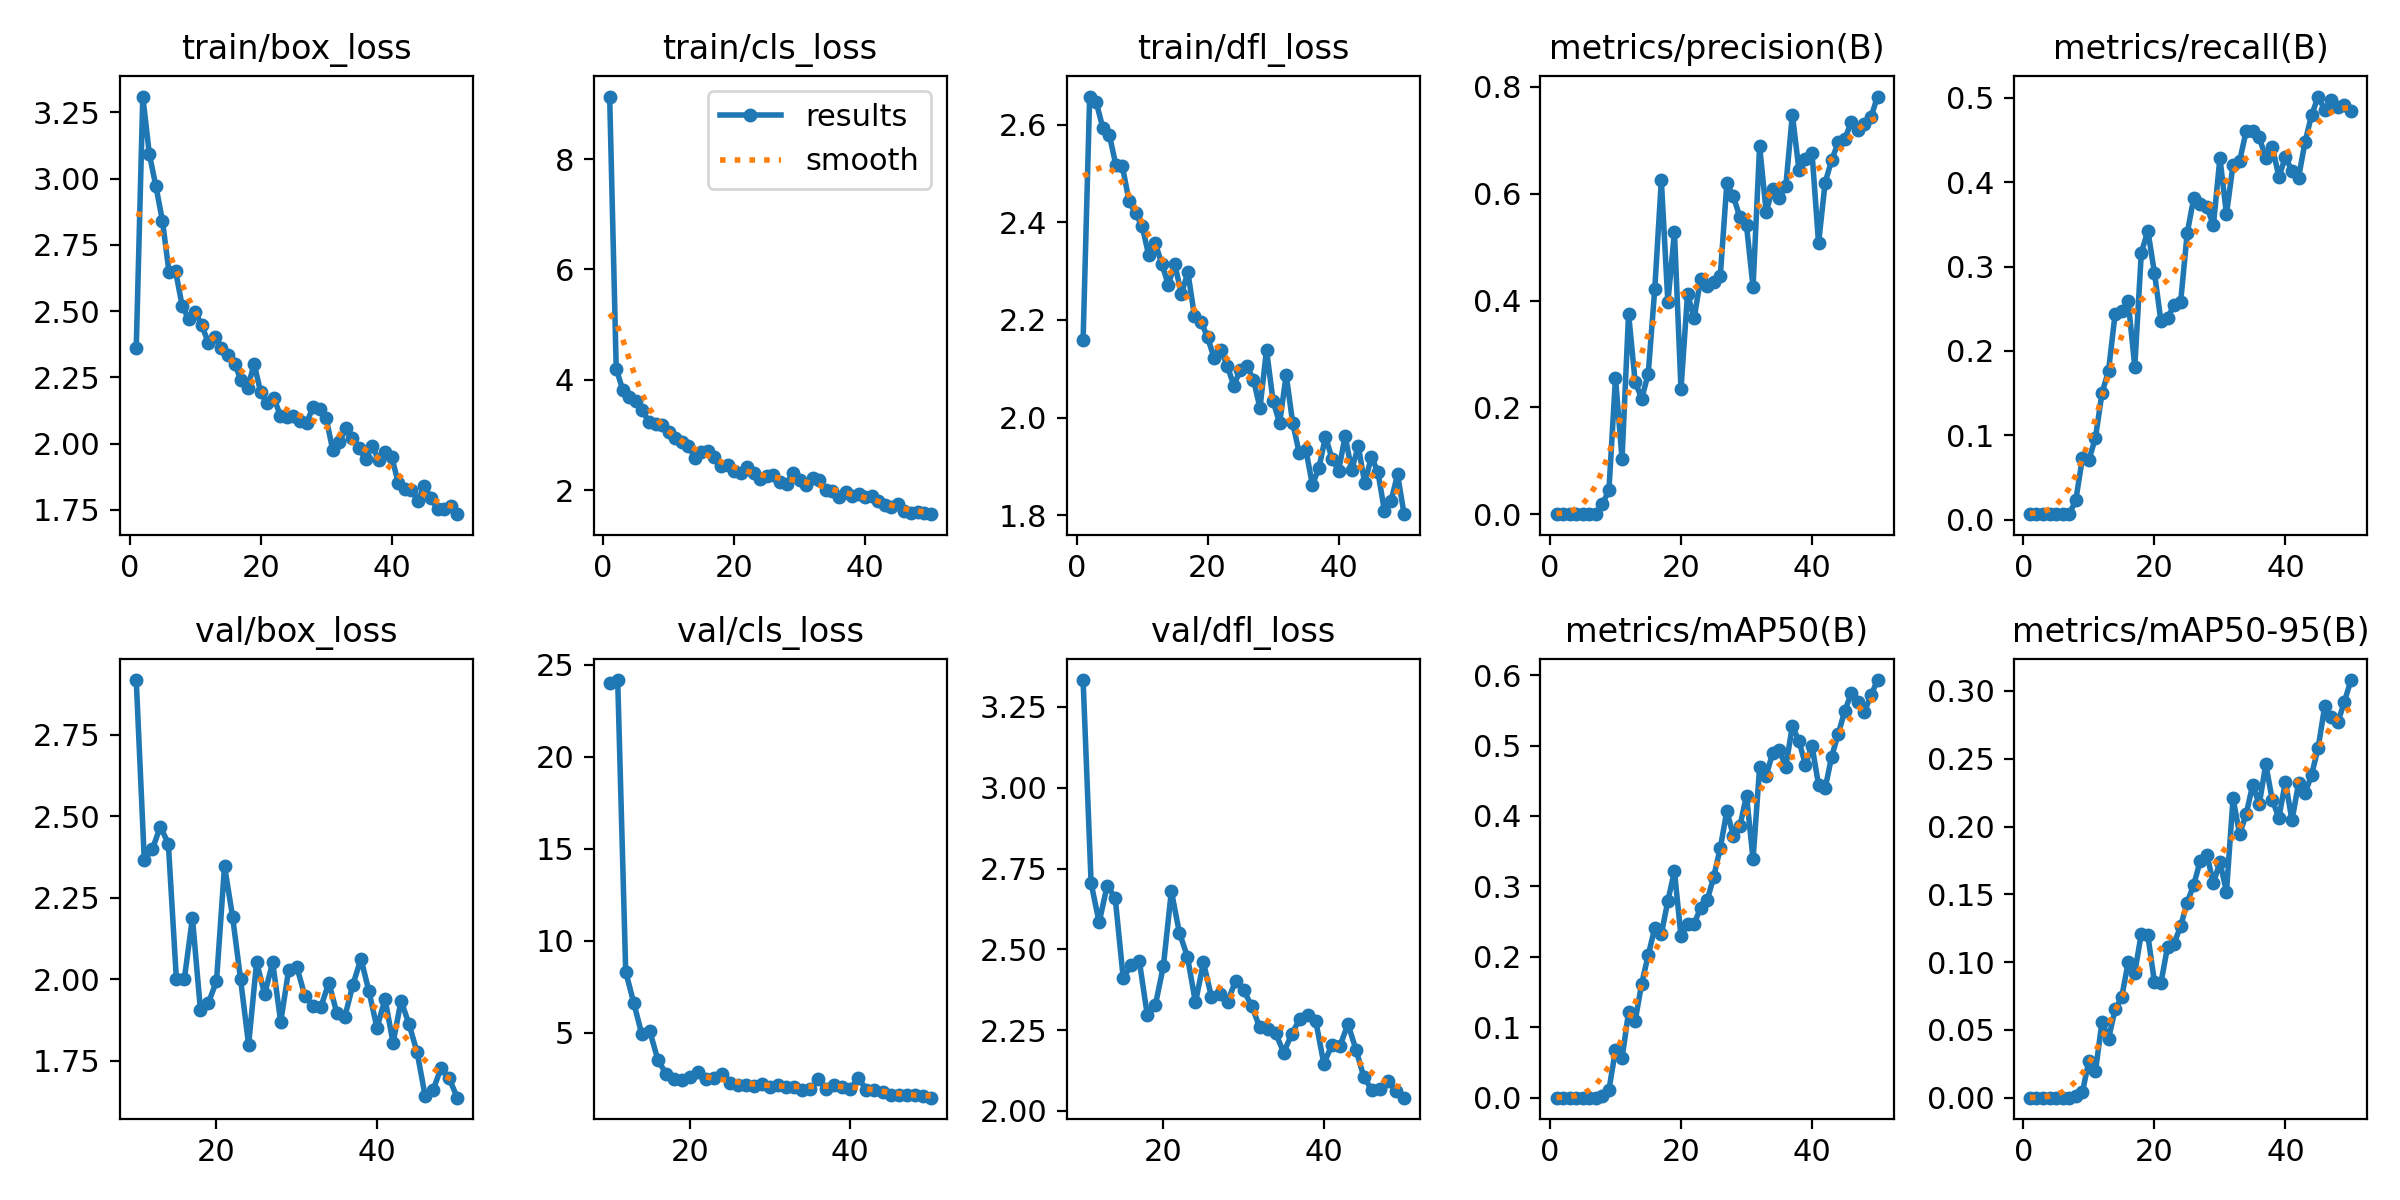

In [17]:
Image(filename="/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/train_results_m/objects/results.png", width=1200)

In the following image we can see some of the results obtained with the validation set, where we can check that the model is not doing good on any of the labels, reaching super low metrics.

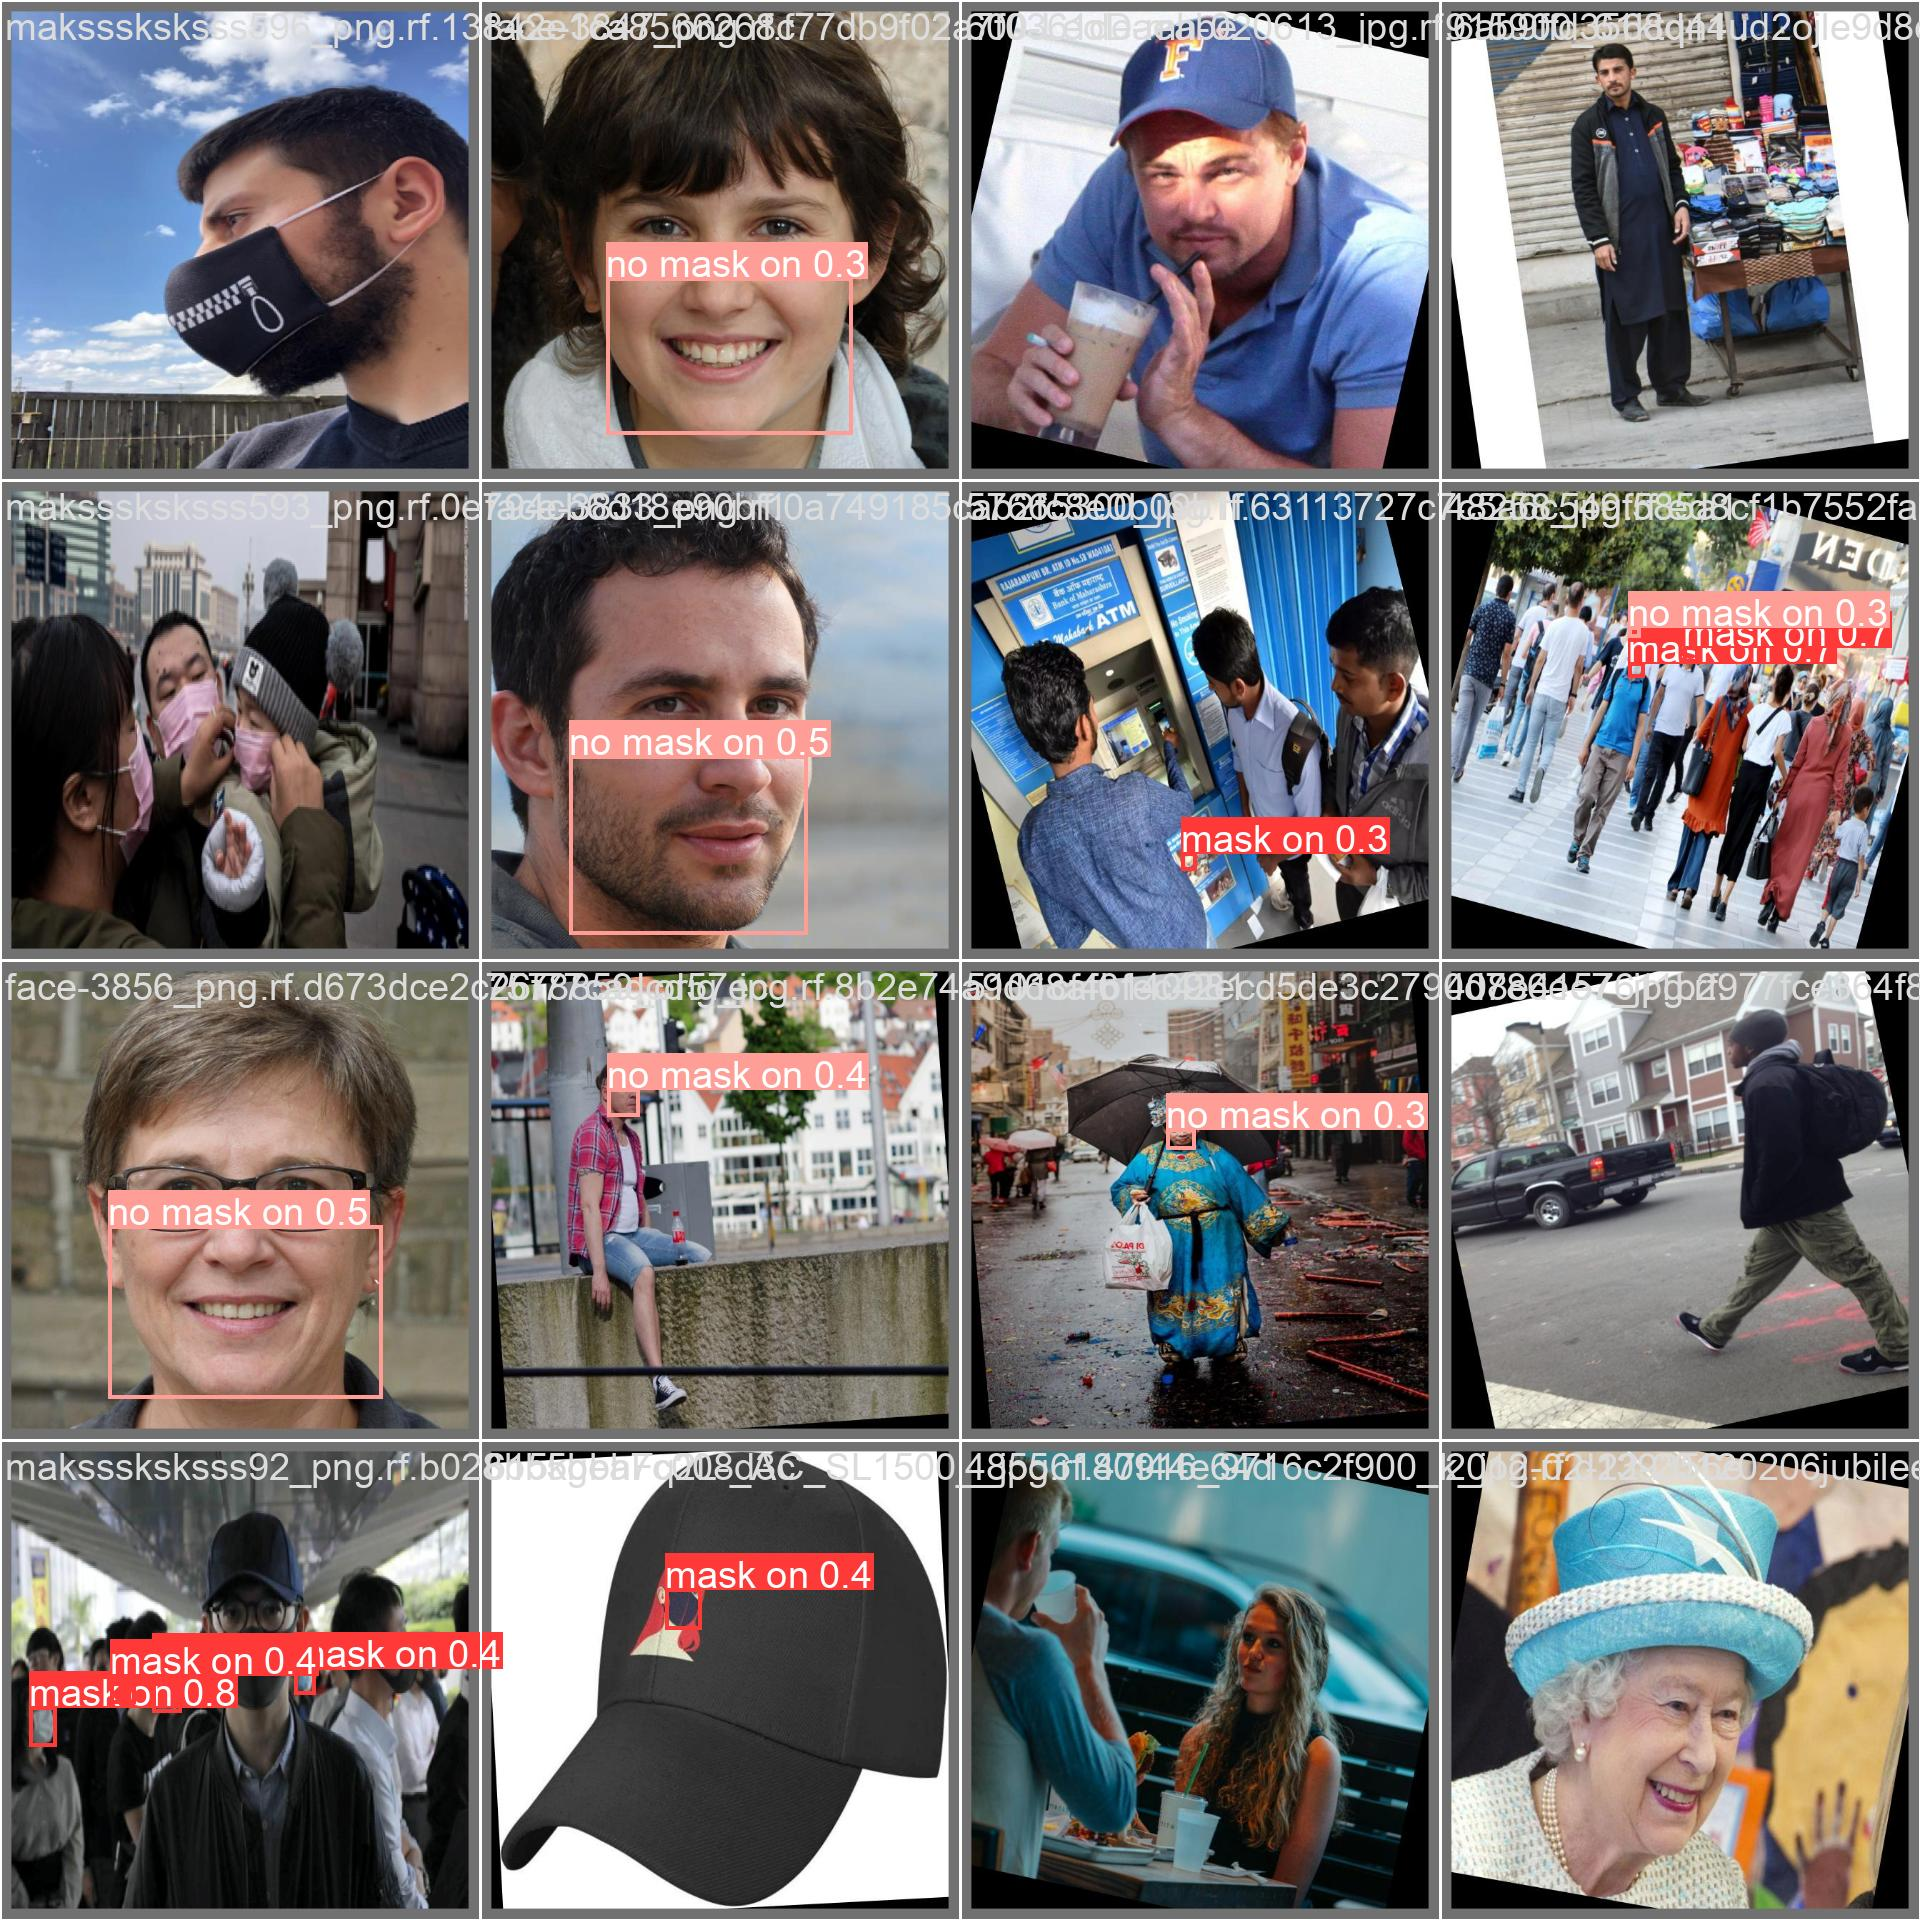

In [19]:
Image(filename="/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/train_results_m/objects/val_batch1_pred.jpg", width=1200)

Looking into the validation set results with our worst model below, we see bad metrics with over 57% of mAP50 in every class, which as we mentioned earlier often vary a lot in form and aspect within our dataset, making somewhat harder for the model to identify it.

In [25]:
!yolo task=detect mode=val model="/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/train_results_m/objects/weights/best.pt" data="/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/data.yaml"

Ultralytics YOLOv8.1.22 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100% 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:07<00:00,  1.48s/it]
                   all         73        260      0.792      0.486      0.593      0.308
               mask on         73        181      0.781      0.508      0.617      0.316
            no mask on         73         79      0.803      0.464       0.57      0.299
Speed: 5.7ms preprocess, 28.1ms inference, 0.0ms loss, 20.8ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


## **Nano Model (YOLOv8n)**

In [20]:
!yolo task=detect mode=train model=yolov8n.pt data="/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/data.yaml" epochs=50 imgsz=640 batch=16 project="/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/train_results_n" name=objects


Ultralytics YOLOv8.1.22 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/train_results_n, name=objects, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=F

### Check Results

In the Normalized Confusion Matrix we see that our model has a not very good detection rate with 'mask on' (83%), and 'no mask on' (72%).

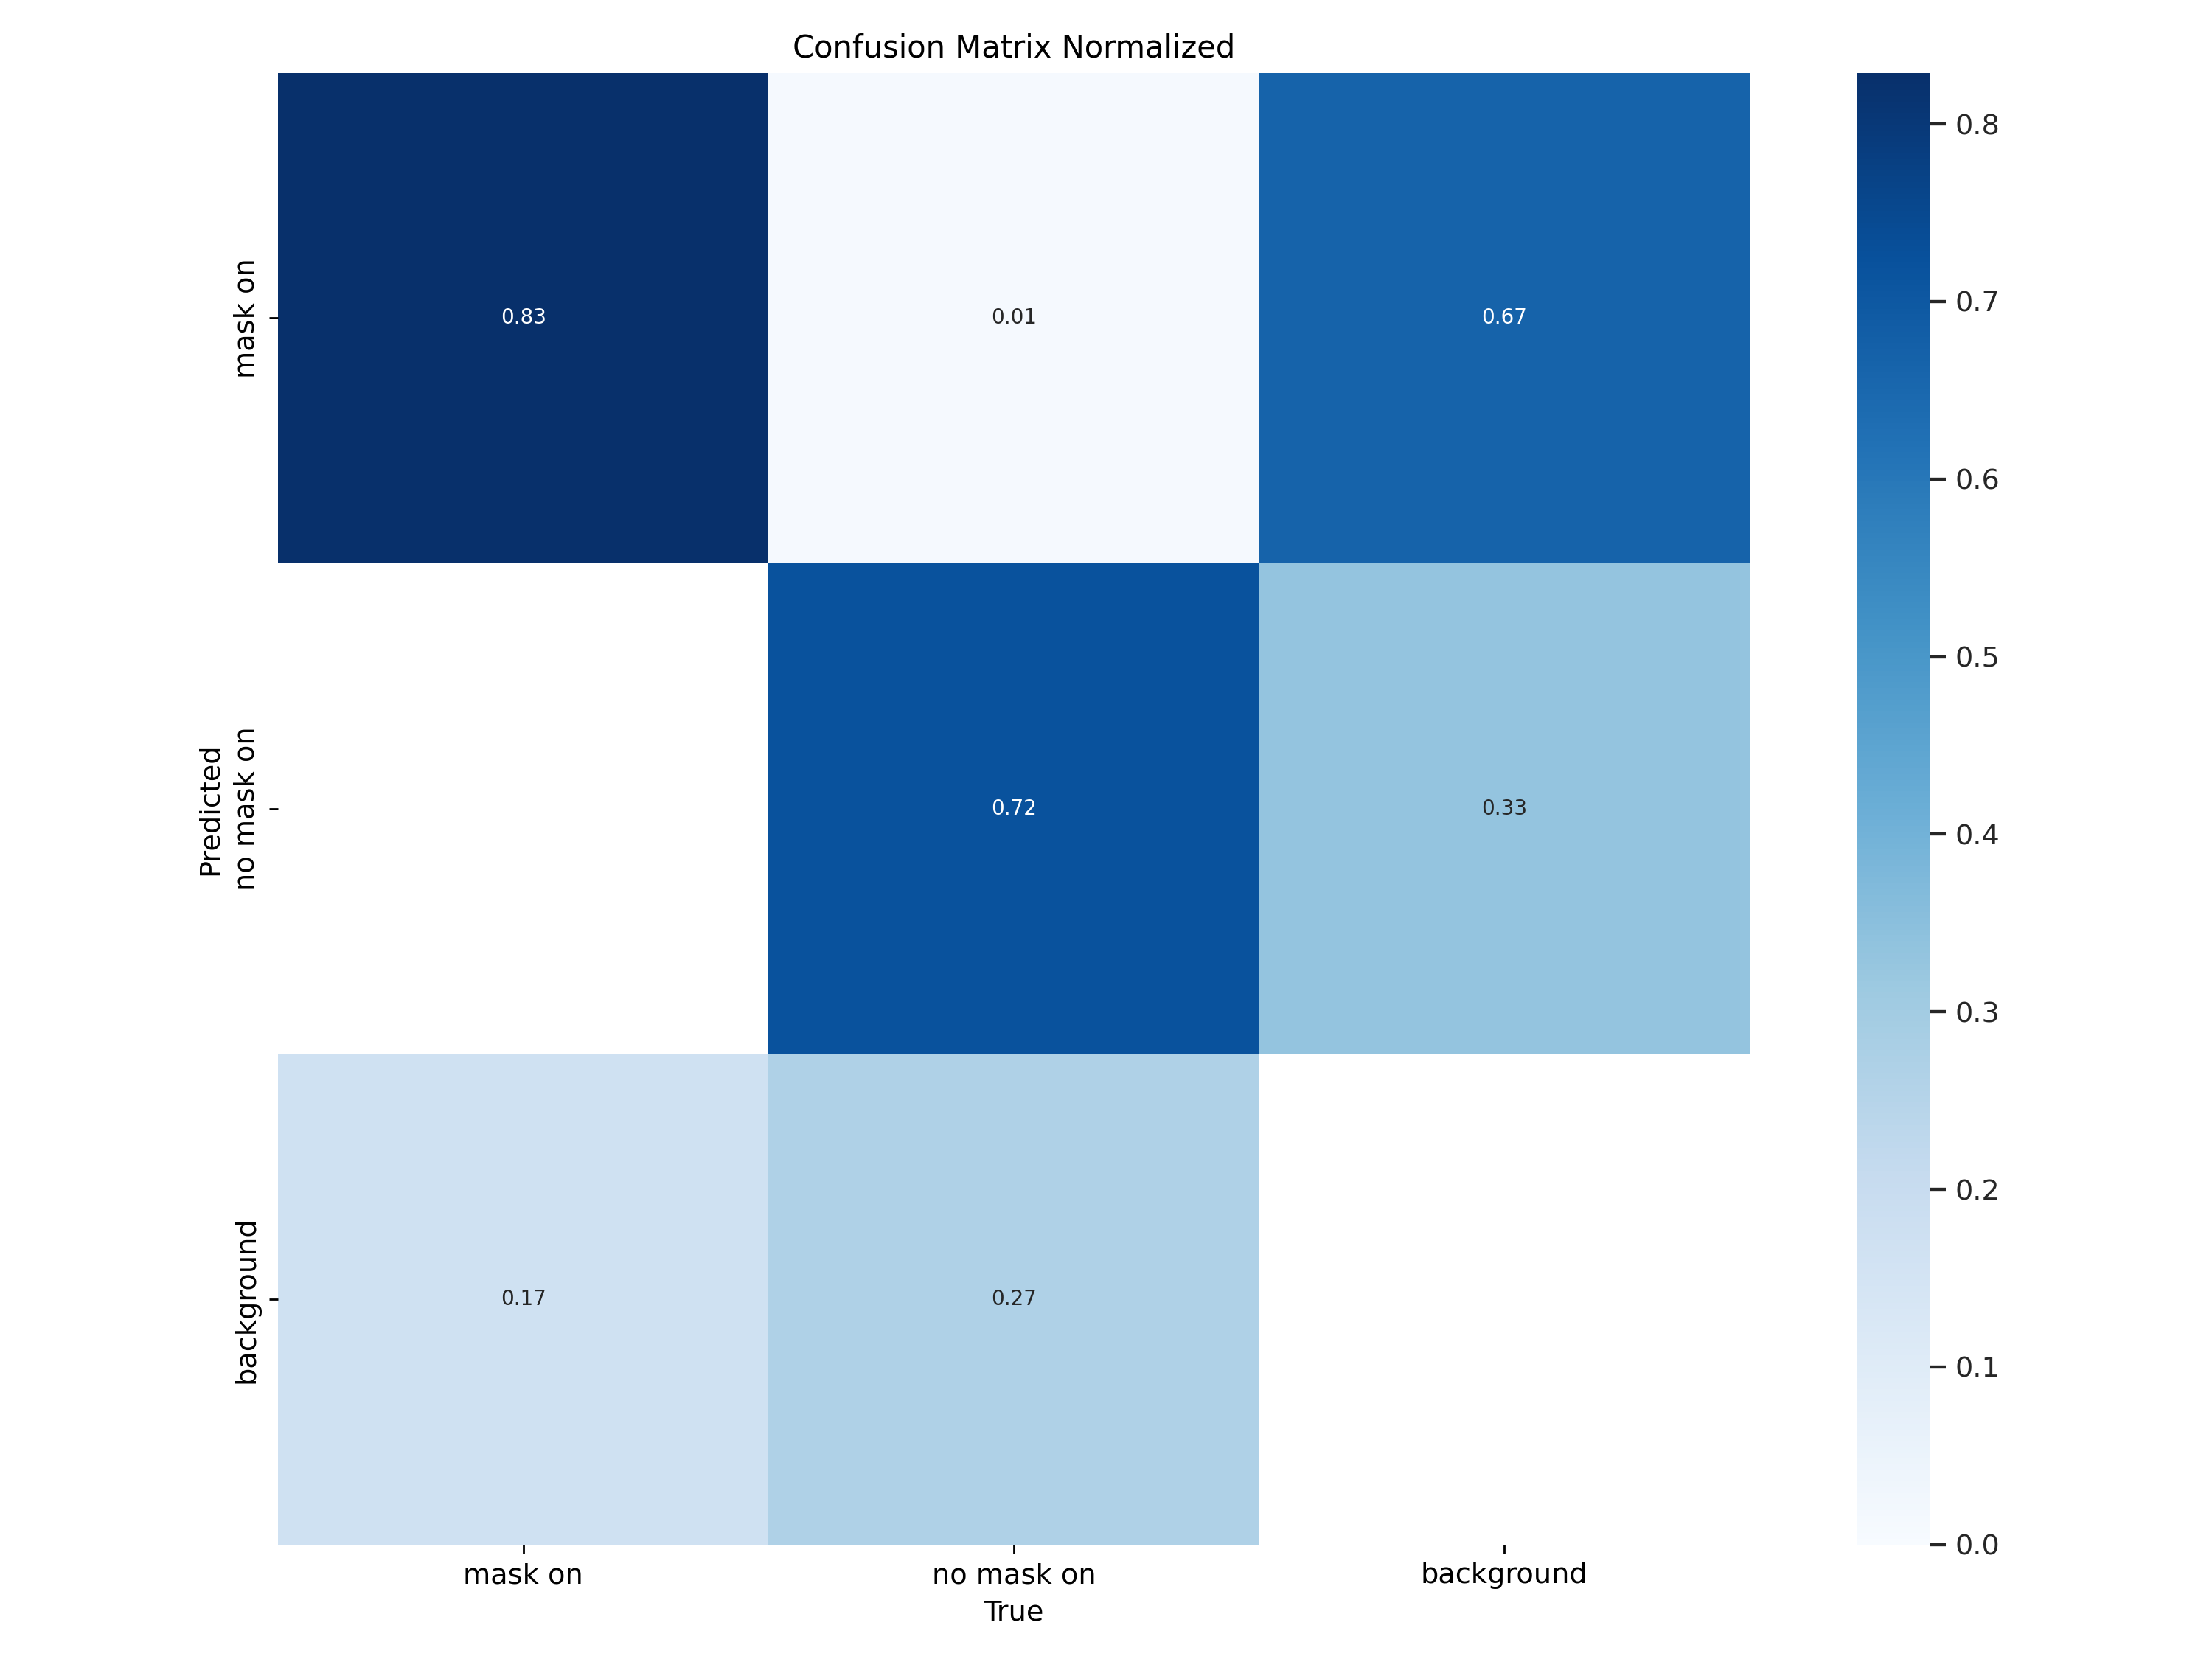

In [21]:
from IPython.display import Image, display
Image(filename="/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/train_results_n/objects/confusion_matrix_normalized.png", width=600)

With the results seen in the following graphs, we can spot that losses have been decreasing along the 50 epochs, as we do not see a long flat tail at the end of these epochs, we may assume we could achieve better results in loss metrics if we increase the number of epochs.

Precision and Recall are also seeing a steep improvement throughout the epochs, but still with some room for increasing the metrics.

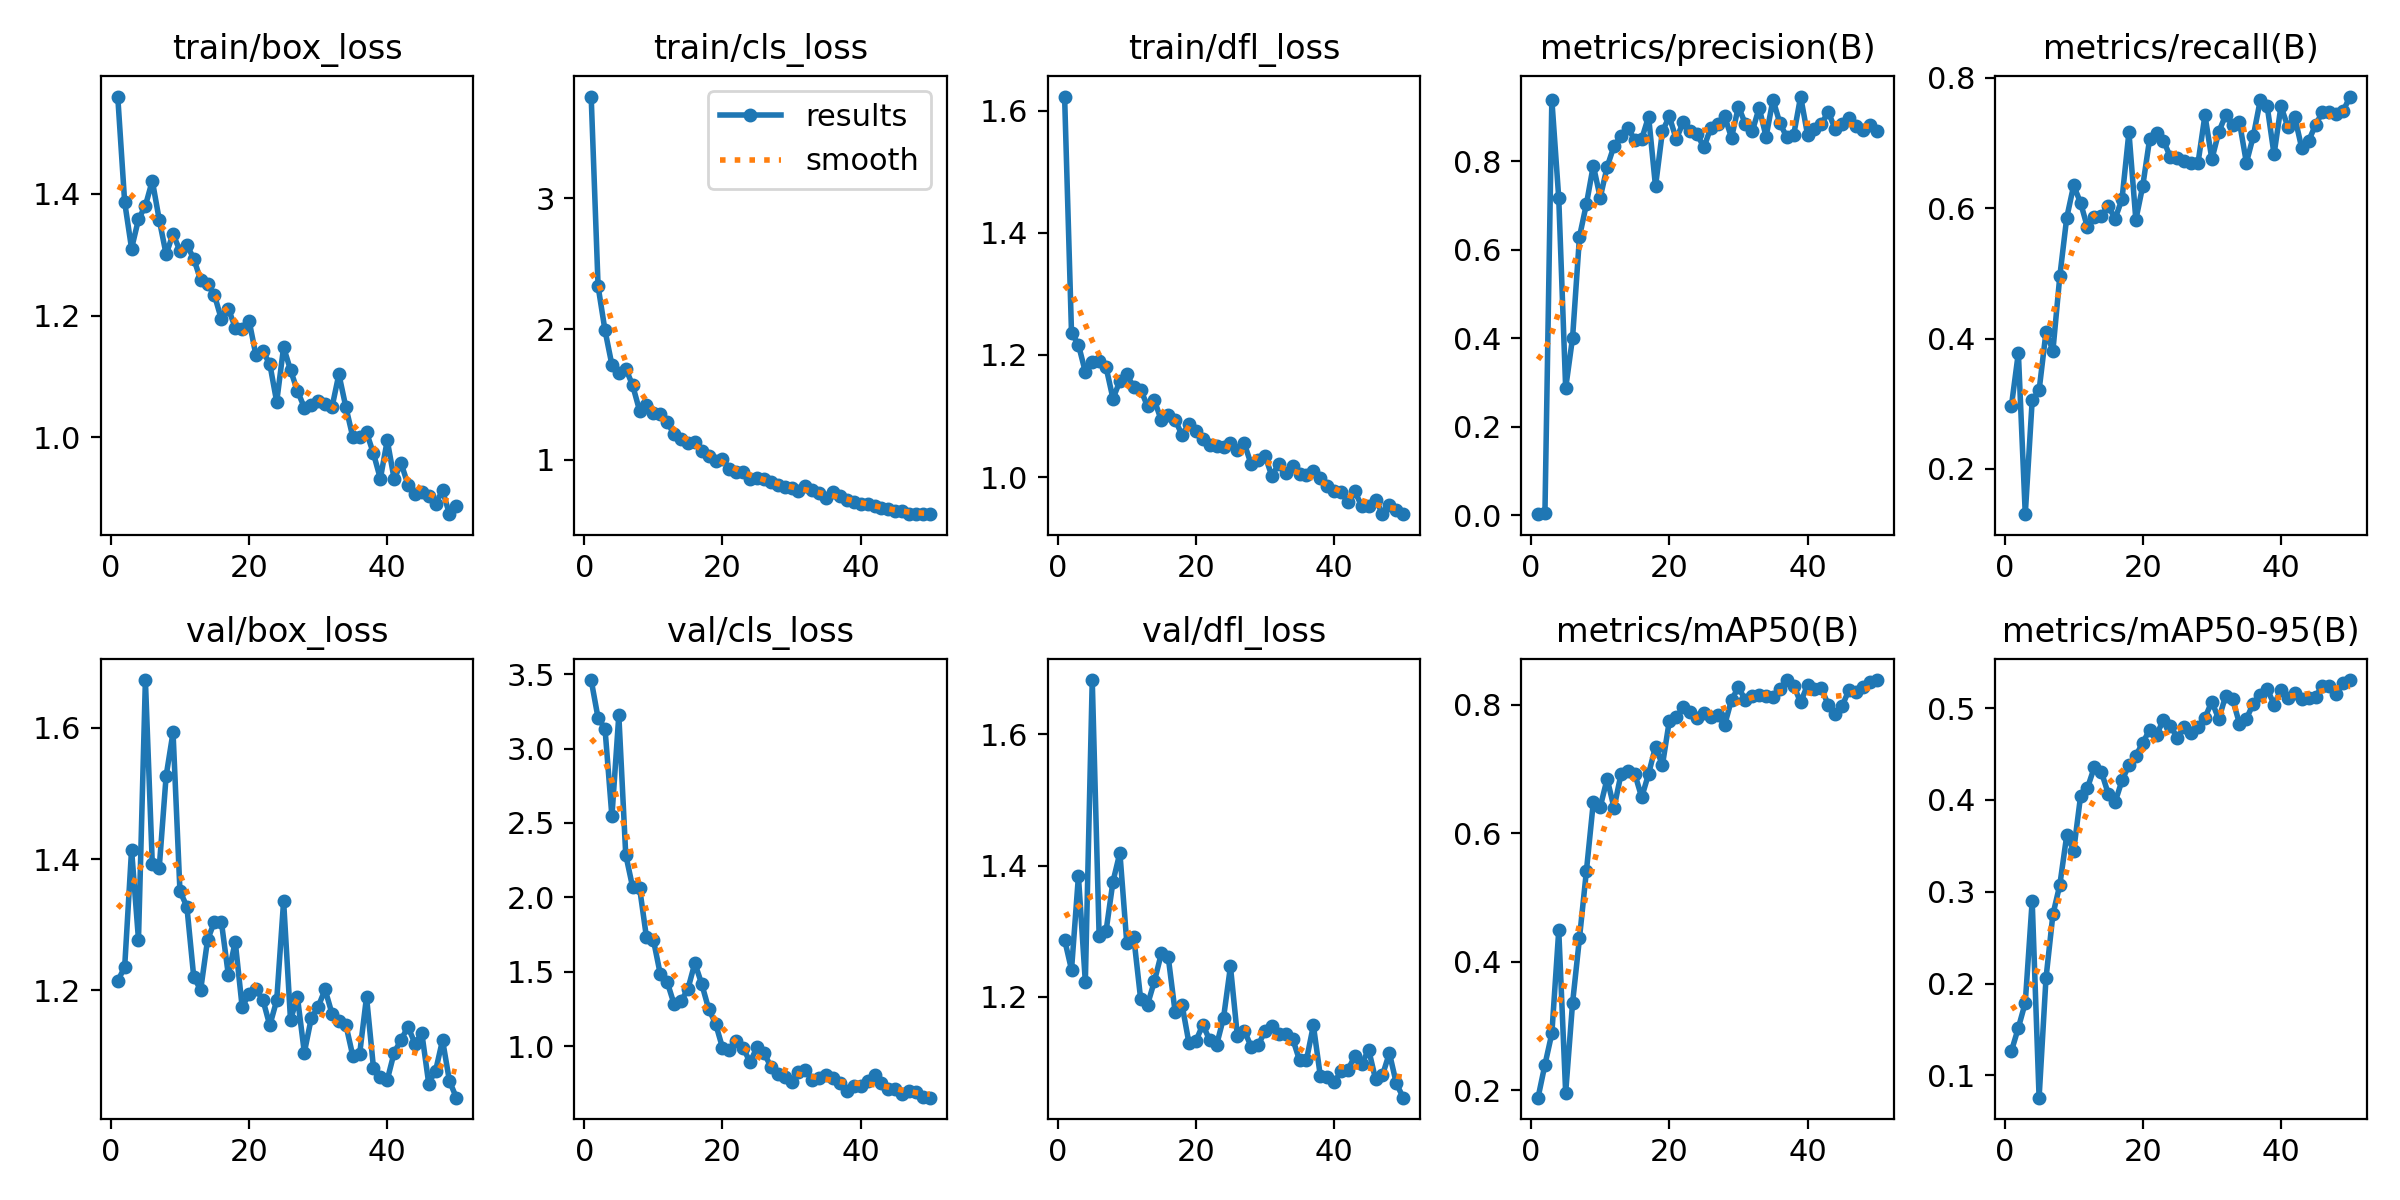

In [22]:
Image(filename="/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/train_results_n/objects/results.png", width=1200)

In the following image we can see some of the results obtained with the validation set, where we can check that the model is doing pretty good on the different labels labels, reaching super high metrics.

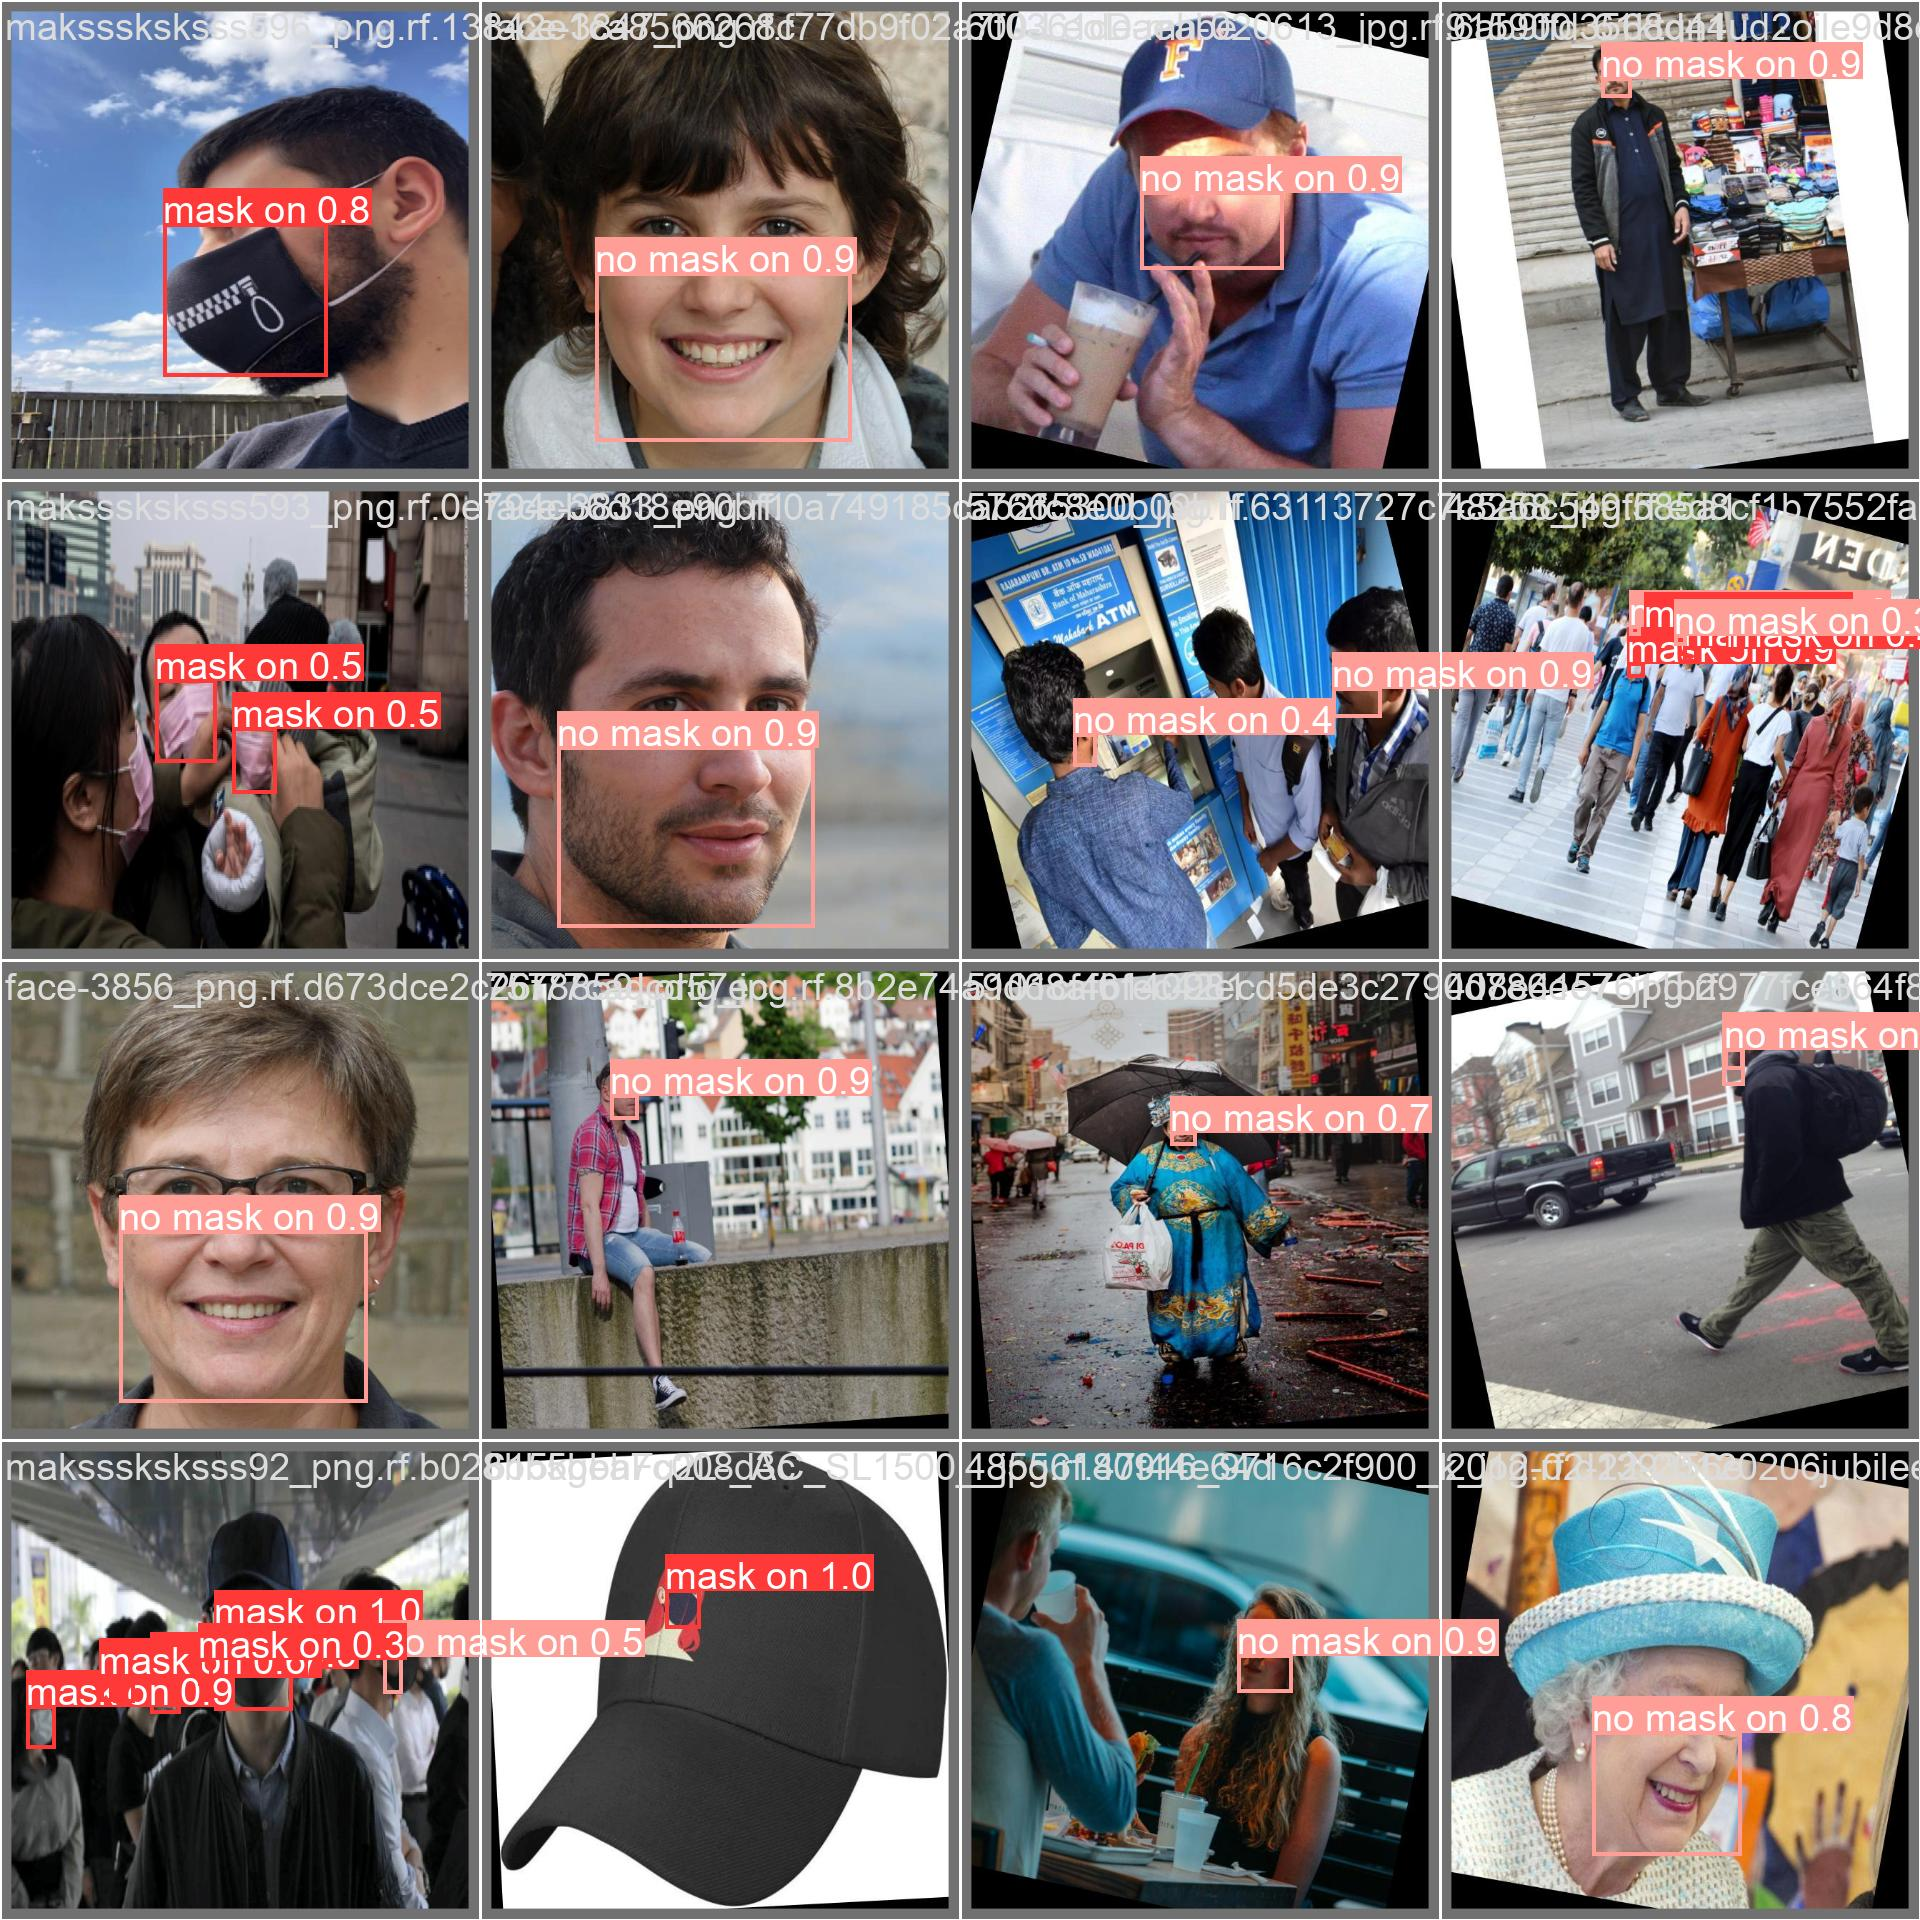

In [23]:
Image(filename="/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/train_results_n/objects/val_batch1_pred.jpg", width=1200)

Looking into the validation set results with our best model below, we see great metrics with over 83% of mAP50 in every class.

In [24]:
!yolo task=detect mode=val model="/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/train_results_n/objects/weights/best.pt" data="/content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/data.yaml"

Ultralytics YOLOv8.1.22 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/My Drive/Colab Notebooks/Deep Learning/Group_Assignment/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100% 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:07<00:00,  1.53s/it]
                   all         73        260      0.902      0.735      0.839       0.53
               mask on         73        181      0.915      0.773      0.868      0.512
            no mask on         73         79      0.889      0.696       0.81      0.548
Speed: 12.8ms preprocess, 24.1ms inference, 0.0ms loss, 27.2ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val
